In [32]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [34]:
import pandas as pd
Kayaking= pd.read_excel("V02Max_Combined.xlsx",sheet_name= "Kayaking")
Triathlon= pd.read_excel("V02Max_Combined.xlsx",sheet_name= "Triathlon")
Fencing= pd.read_excel("V02Max_Combined.xlsx",sheet_name= "Fencing")
Athletes=pd.read_excel("V02Max_Combined.xlsx",sheet_name= "Athletes")
AllAthletes=pd.read_excel("AllAthletesData.xlsx")
Athletes.head()

C:\Users\Nidhi\anaconda3\Lib\site-packages\openpyxl\worksheet\_read_only.py:81: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():
C:\Users\Nidhi\anaconda3\Lib\site-packages\openpyxl\worksheet\_read_only.py:81: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():
C:\Users\Nidhi\anaconda3\Lib\site-packages\openpyxl\worksheet\_read_only.py:81: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


,ID,age,Weight,Height,P_vt1,P_vt2,sport,Gender,Ethnicity,First Name,Last Name
0,1,15,53.7,161,50,140,fencing,Female,African,Olivia,Martinez
1,2,15,56.2,162,80,127,fencing,Male,African,Ethan,Reynolds
2,3,16,89.9,191,155,300,fencing,Male,White,Jackson,Harper
3,4,16,76.5,180,215,275,fencing,Male,White,Liam,Sanchez
4,5,17,76.4,186,110,172,fencing,Female,White,Ava,Thompson


In [35]:
df_excersizetype['HR']=60/(df_excersizetype['RR']/1000)
df_excersizetype
df_excersizetype.loc[df_excersizetype['HR'] < 100,'Zone Type']='Zone 1'
df_excersizetype.loc[(df_excersizetype['HR'].between(100,120)), 'Zone Type'] = 'Zone 2'
df_excersizetype.loc[(df_excersizetype['HR'].between(121,135)), 'Zone Type'] = 'Zone 3'
df_excersizetype.loc[(df_excersizetype['HR'].between(136,155)), 'Zone Type'] = 'Zone 4'
df_excersizetype.loc[df_excersizetype['HR'] > 155, 'Zone Type'] = 'Zone 5'
df_excersizetype

NameError: name 'df_excersizetype' is not defined

Q1 Join all sport-related tables to produce one dataframe that has all athletes values. 
The final table should only have the same 5 columns: ID, time,power,RR, vo2, power.
Write this dataframe to an excel file.


In [ ]:
dataframe=pd.concat([Kayaking,Triathlon,Fencing])
dataframe                    

In [ ]:
df_excersizetype=pd.read_excel('AllAthletesData.xlsx',sheet_name='AllAthletesData')
df_excersizetype.loc[df_excersizetype['time'] < 0,'ExType']='Warm Up' 
df_excersizetype.loc[(df_excersizetype['time'] >= 0) & (df_excersizetype['power'] > 0), 'ExType'] = 'GET'
df_excersizetype.loc[(df_excersizetype['time'] >= 0) & (df_excersizetype['power'] == 0), 'ExType'] = 'Cool Down'
df_excersizetype

Q49 Retrieve the row with minimum IBI for fencing athletes using sorting technique.

In [ ]:
Fencing= pd.read_excel("V02Max_Combined.xlsx",sheet_name= "Fencing")
Fencing_df=Fencing.sort_values('RR')
min_ibirow=round(Fencing_df.iloc[0],2)
print(min_ibirow)

Q50 Create a violin chart using any 2 columns in the dataset

In [ ]:
Athletes= pd.read_excel("V02Max_Combined.xlsx",sheet_name= "Athletes")
sns.violinplot(x='Gender',y='age',data= Athletes,inner='quartile',bw=0.5,hue='Gender',palette='RdPu')


Q51 List every athlete’s V02 ml/kg

In [ ]:
df_VO2=AllAthletes[['ID','VO2']].groupby(by='ID').sum().reset_index()
df_VO2=df_VO2.merge(Athletes[['ID','First Name','Last Name','Weight','Height']],on='ID')
df_VO2['VO2'] /= df_VO2['Weight']
for index, data in df_VO2.iterrows():
    print(f"{data['Last Name']},{data['First Name']} has {round(data['VO2'],2)} VO2 ml/kg")

Q52 Using all markers of fitness available to you, who is fittest athlete. Write 1-2 lines about the analysis that led to your insight.

In [ ]:
#Higher VO2 max
df_VO2['BMI'] = df_VO2['Weight']/((df_VO2['Height']/100)**2)
df_fit = df_VO2[(df_VO2['BMI']<25) & (df_VO2['BMI']>19)]
id = df_fit['VO2'].idxmax()
print(f"The fittest athlete is {df_fit['Last Name'][id]}, {df_fit['First Name'][id]} as her BMI is in the fit Range and her VO2 ml/kg is the highest")


Q53 phonebook={"john":938477566,"Jack":938377264,"Jill":947662781}  ,find the phone number of Jill

In [ ]:
phonebook={"john":938477566,"Jack":938377264,"Jill":947662781}
Jill_phno=phonebook["Jill"]
print("Jill's phone number is",Jill_phno)


Q54 Create a Pie chart for  Athletes and explode the widge with Highest V02 kg/ml in and Label by Athlete ID

In [ ]:
plt.figure(figsize=(8,8))
fig, ax = plt.subplots()
explode = df_VO2['VO2'].apply(lambda x: 0.4 if x==max(df_VO2['VO2']) else 0)
ax.pie(df_VO2['VO2'], labels=df_VO2.ID, explode=explode)
plt.show()


Q55 Using a for loop iterate through HR for all trathletes and display all details of the athlete with the highest heart rate

In [ ]:
Triathlon['HR'] = 60/(Triathlon['RR']/100)
id = Triathlon['ID'][Triathlon['HR'].idxmax()]
Athletes[Athletes['ID']==id]


Q56 Display a histogram to show distribution of athletes by sport.

In [ ]:
plt.figure(figsize=(5,4))
Athletes= pd.read_excel("V02Max_Combined.xlsx",sheet_name= "Athletes")
Athletes['sport'].hist(color='purple',grid= False)

#add labels and title
plt.title('Athletes distribution by sport',fontsize=12,color='green')
plt.xlabel('sport',fontsize=10,color='green')
plt.ylabel('Frequency',fontsize=10,color='green')




Q57 get the first letter of last name of students using for loops and RegEX

In [ ]:
for i in Athletes['Last Name']:
    print(re.search('^.',i).group())
    

Q58 What is the average % difference in heart rate between warm up and GET for all athletes?

In [ ]:
dataframe['HR']=60/(dataframe['RR']/100)
df_warmup = dataframe[dataframe['time']<0]
df_get = dataframe[dataframe['time']>0]
df_get = df_get[df_get['power']!=0]
hr_warmup = df_warmup['HR'].mean()
hr_get = df_get['HR'].mean()
avg_pct_dif = 200*(hr_get-hr_warmup)/(hr_warmup+hr_get)
print('The average % difference in heart rate between warm up and GET for all athletes is:',round(avg_pct_dif,2))

Q59 Who is the tallest athlete in the dataset. What is his sport and his Vo2 ml/kg?

In [ ]:
tallest_athlete= Athletes.iloc[Athletes['Height'].idxmax()]
print(f"""{tallest_athlete['Last Name']},{tallest_athlete['First Name']} is the tallest Athlete.
His sport is {tallest_athlete['sport']} and his VO2 ml/kg is {round(df_VO2[df_VO2['ID']==tallest_athlete['ID']]['VO2'].values[0])}""")

Q60 get the last letter      of athletes last names using RegEX

In [20]:
Athletes= pd.read_excel("V02Max_Combined.xlsx",sheet_name= "Athletes")
text_column=Athletes['Last Name']
last_letter= text_column.str.extract(r'(\w)$')
print(last_letter)

    0
0   z
1   s
2   r
3   z
4   n
5   z
6   s
7   t
8   e
9   n
10  n
11  n
12  r
13  l
14  e
15  n
16  r
17  s


C:\Users\Nidhi\anaconda3\Lib\site-packages\openpyxl\worksheet\_read_only.py:81: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


Q61 Reverse an arrays order in Python. You can use any array with any values you like.

In [23]:
#Define a simple array
arr=[11,12,13,14,15,16,17,18]
#Reverse the array
Rev_arr=arr[::-1]
print(Rev_arr)

[18, 17, 16, 15, 14, 13, 12, 11]


Q62 What is the root mean of successive differences for 30 consecutive minutes for each athlete.

In [43]:
import pandas as pd
import numpy as np
kayaking_df = pd.read_excel("V02Max_Combined.xlsx", sheet_name="Kayaking")
triathlon_df = pd.read_excel("V02Max_Combined.xlsx", sheet_name="Triathlon")
fencing_df = pd.read_excel("V02Max_Combined.xlsx", sheet_name="Fencing")
athletes_df = pd.read_excel("V02Max_Combined.xlsx", sheet_name="Athletes")
kayaking_df['Sport'] = 'Kayaking'
triathlon_df['Sport'] = 'Triathlon'
fencing_df['Sport'] = 'Fencing'
combined_df = pd.concat([kayaking_df, triathlon_df, fencing_df], ignore_index=True)
combined_df['time'] = pd.to_datetime(combined_df['time'], errors='coerce')
combined_df = combined_df.sort_values(['ID', 'time'])
combined_df['RR'] = pd.to_numeric(combined_df['RR'], errors='coerce')
print("NaN Values in RR before RMSD calculation:\n", combined_df['RR'].isna().sum())
def calculate_rmsd(series):
    diffs = series.diff().dropna()
    return np.sqrt(np.mean(diffs**2))
def process_id(group):
    group['duration'] = (group['time'] - group['time'].min()).dt.total_seconds()
    print(f"Processing {group['ID'].iloc[0]} with {len(group)} entries.")
    if len(group) < 2:
        return pd.Series({'RMSD': np.nan})
    return pd.Series({'RMSD': calculate_rmsd(group['RR'])})
results = combined_df.groupby(['ID', 'Sport']).apply(process_id).reset_index()
print("\nRMSD Results for all athletes:")
print(results)

C:\Users\Nidhi\anaconda3\Lib\site-packages\openpyxl\worksheet\_read_only.py:81: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


NaN Values in RR before RMSD calculation:
 1148
Processing 1 with 2403 entries.
Processing 2 with 2000 entries.
Processing 3 with 3443 entries.
Processing 4 with 3694 entries.
Processing 5 with 3594 entries.
Processing 6 with 2683 entries.
Processing 7 with 2207 entries.
Processing 8 with 2121 entries.
Processing 9 with 2823 entries.
Processing 10 with 2635 entries.
Processing 11 with 3854 entries.
Processing 12 with 3648 entries.
Processing 13 with 3637 entries.
Processing 14 with 2808 entries.
Processing 15 with 2691 entries.
Processing 16 with 2840 entries.
Processing 17 with 2410 entries.
Processing 18 with 2571 entries.

RMSD Results for all athletes:
    ID      Sport        RMSD
0    1    Fencing   25.839445
1    2    Fencing   40.715167
2    3    Fencing   20.395964
3    4    Fencing   33.330127
4    5    Fencing  115.303320
5    6    Fencing  447.288252
6    7    Fencing   23.691275
7    8    Fencing  504.363391
8    9    Fencing   22.536654
9   10    Fencing   26.860081
10  1

C:\Users\Nidhi\anaconda3\Lib\site-packages\openpyxl\worksheet\_read_only.py:81: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():
C:\Users\Nidhi\anaconda3\Lib\site-packages\openpyxl\worksheet\_read_only.py:81: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():
C:\Users\Nidhi\AppData\Local\Temp\ipykernel_4228\2308011099.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  results = combined_df.groupby(['ID', 'Sport']).apply(process_id).reset_index()


Q63 On average how many minutes did each athlete in the sport of fencing spend in Zone 5?

In [143]:
total_time = 0
for i in Fencing['ID'].unique():
    df_temp = Fencing[Fencing['ID']==i]
    total_time += (df_temp['time'].iloc[-1]-df_temp['time'].iloc[0])/60 #in minutes
print('The Average Time spent by athletes in Fencing is:',total_time/len(Fencing['ID'].unique()),'minutes')

The Average Time spent by athletes in Fencing is: 20.30368 minutes


Q64 Count athletes based on Gender using count plot

Text(0.5, 0, 'Count')

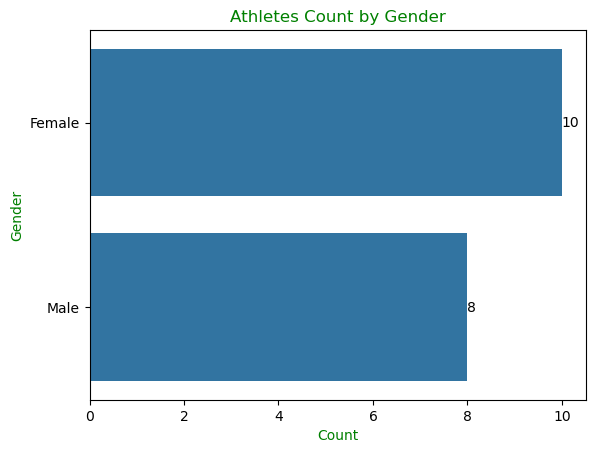

In [153]:
ax=sns.countplot(Athletes['Gender'])
ax.bar_label(ax.containers[0])
plt.title('Athletes Count by Gender',fontsize=12,color='green')
plt.ylabel('Gender',fontsize=10,color='green')
plt.xlabel('Count',fontsize=10,color='green')

In [201]:
#Triathlon dataframe
print(Triathlon)
avgTriathlon=Triathlon['HRV'].mean()
print('The average HRV of the triathletes is: ',round(avgTriathlon,2))

      ID     time     RR       VO2  power         HR
0     17 -182.408  736.0  0.363762      0   8.152174
1     17 -181.672  736.0  0.363762      0   8.152174
2     17 -180.968  704.0  0.363762      0   8.522727
3     17 -180.268  700.0  0.363762      0   8.571429
4     17 -179.616  652.0  0.363762      0   9.202454
...   ..      ...    ...       ...    ...        ...
4976  18  947.288  536.0  0.507071      0  11.194030
4977  18  947.816  528.0  0.507071      0  11.363636
4978  18  948.344  528.0  0.507071      0  11.363636
4979  18  948.884  540.0  0.507071      0  11.111111
4980  18  949.424  540.0  0.507071      0  11.111111

[4981 rows x 6 columns]


KeyError: 'HRV'

In [217]:
print(df_excersizetype)
avg(df_excersizetype)==(df_excersizetype['HR'].avg())
print('The average HR of the AllAthletes is: ',round(avg(df_excersizetype),2))

       ID     time     RR       VO2  power     ExType          HR Zone Type
0       1 -130.840  672.0  0.302008      0    Warm Up   89.285714    Zone 1
1       1 -130.168  672.0  0.302008      0    Warm Up   89.285714    Zone 1
2       1 -129.536  632.0  0.301336      0    Warm Up   94.936709    Zone 1
3       1 -128.824  712.0  0.301336      0    Warm Up   84.269663    Zone 1
4       1 -127.948  876.0  0.301336      0    Warm Up   68.493151    Zone 1
...    ..      ...    ...       ...    ...        ...         ...       ...
52057  18  947.288  536.0  0.507071      0  Cool Down  111.940299    Zone 2
52058  18  947.816  528.0  0.507071      0  Cool Down  113.636364    Zone 2
52059  18  948.344  528.0  0.507071      0  Cool Down  113.636364    Zone 2
52060  18  948.884  540.0  0.507071      0  Cool Down  111.111111    Zone 2
52061  18  949.424  540.0  0.507071      0  Cool Down  111.111111    Zone 2

[52062 rows x 8 columns]


NameError: name 'avg' is not defined